In [1]:
import numpy as np
import pandas as pd

In [2]:
cols = np.arange(1,13,1)
crime = pd.read_csv('./02. crime_in_Seoul_include_gu_name.csv',engine='python',encoding='utf-8',
                   usecols=cols)
crime.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [3]:
#pandas의 pivot table -> pink wink 깃허브에서 sales-funnel 자료 받기
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('./02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [5]:
#Name항목을 index로 지정하고 pivot table을 생성
#숫자형 컬럼만 남고, 중복된 인덱스 항목은 평균으로 저장
pd.pivot_table(df,index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [6]:
#index 여러개 지정
pd.pivot_table(df, index=['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [7]:
#특정 value만 나타나도록
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [8]:
#기본은 평균으로 저장됨. 합계를 사용하려면 aggfunc사용
pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [9]:
#합계,평균을 분석하고 빈칸은 NaN이 아니라 0으로 수정
pd.pivot_table(df,index=['Manager','Rep','Product'],
              values=['Price','Quantity'],
              aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [10]:
#데이터 index를 관서별에서 구별로 바꾸기
crime_anal = pd.pivot_table(crime,index='구별',aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [11]:
#검거율 계산
crime_anal['강간 검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도 검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인 검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도 검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력 검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100



In [12]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,220,240,26,14,4,4,1277,3026,2180,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [13]:
del crime_anal['강도 검거']

In [14]:
temp = ['살인 검거','절도 검거','폭력 검거','강간 검거']
for n in range(0,4):
    del crime_anal[temp[n]]

In [15]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [16]:
#검거율 100이 넘는 숫자는 100으로 변경
con_list = ['강간 검거율','강도 검거율','살인 검거율','절도 검거율','폭력 검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [17]:
crime_anal[column]>100

구별
강남구     False
강동구     False
강북구     False
관악구     False
광진구     False
구로구     False
금천구     False
노원구     False
도봉구     False
동대문구    False
동작구     False
마포구     False
서대문구    False
서초구     False
성동구     False
성북구     False
송파구     False
양천구     False
영등포구    False
용산구     False
은평구     False
종로구     False
중구      False
중랑구     False
Name: 폭력 검거율, dtype: bool

In [18]:
#컬럼 발생 삭제
crime_anal.rename(columns={'강간 발생':'강간',
                          '강도 발생':'강도',
                          '살인 발생':'살인',
                          '절도 발생':'절도',
                          '폭력 발생':'폭력'},inplace=True)
crime_anal.columns
col2 = crime_anal.columns[5:10]
col2

Index(['강간 검거율', '강도 검거율', '살인 검거율', '절도 검거율', '폭력 검거율'], dtype='object')

In [19]:
# 데이터 범위 정규화 -> sklearn, preprocessing
from sklearn import preprocessing

col = crime_anal.columns[0:5]
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)

col2 = crime_anal.columns[5:10]
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [20]:
#구별 cctv, 인구수 자료 가지고 오기
result_cctv = pd.read_excel('../seoul_cctv/seoul_cctv.xlsx')
result_cctv['기관명'] = result_cctv['기관명'].str.replace(' ','')
result_cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [21]:
result_pop = pd.read_table('../seoul_cctv/seoul_population.txt',header=2,thousands=',')
result_pop.drop([0],inplace=True)
result_pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
1,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2.00,28396
2,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265
3,2020.3/4,용산구,112451,244953,119074,125879,229786,110604,119182,15167,8470,6697,2.04,39995
4,2020.3/4,성동구,136096,302695,147582,155113,295591,144444,151147,7104,3138,3966,2.17,45372
5,2020.3/4,광진구,166857,361923,174077,187846,348064,168095,179969,13859,5982,7877,2.09,50047


In [22]:
#구 이름을 기준으로 합치기
result_cctv.rename(columns={'기관명' : '자치구'},inplace=True)
result_cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [23]:
#자치구 기준으로 합치기
#자치구 기준으로 내림차순 정렬, 그리고 set_index로 자치구를 지정해주어야 함.
result_merge = pd.merge(result_pop,result_cctv,on='자치구').sort_values('자치구')
result_merge.set_index('자치구',inplace=True)
crime_anal_norm[['인구수','cctv']] = result_merge[['계','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581


In [24]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581


In [25]:
#컬럼명 수정
col = ['강간','강도','살인','절도','폭력']
for n in range(0,5):
    crime_anal_norm.columns.values[n] = col[n]
    
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581


In [26]:
#범죄 합산 추가
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581,2.034438


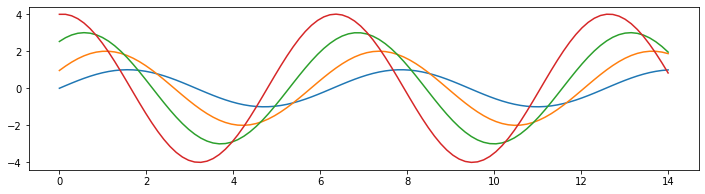

In [27]:
#편리한 시각도구 seaborn
#사인함수 그려보기
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(12,3))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

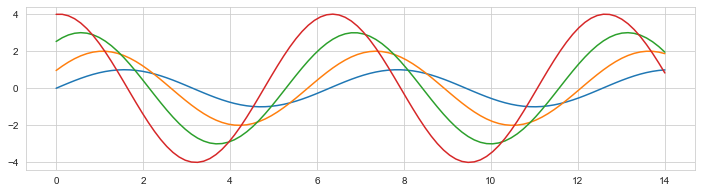

In [28]:
#seaborn의 whitegrid
sns.set_style('whitegrid')

plt.figure(figsize=(12,3))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

In [29]:
#Tips라는 데이터셋, 요일별 흡연 여부와 식사, 팁
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


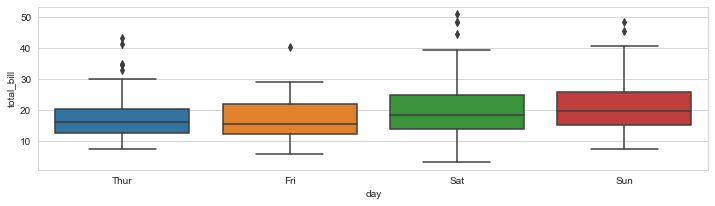

In [30]:
#boxplot, x요일, y금액
plt.figure(figsize=(12,3))
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

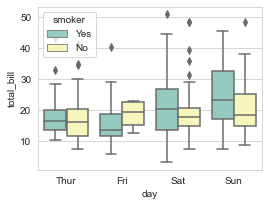

In [31]:
#hue 옵션으로 흡연 여부 구분
plt.figure(figsize=(4,3))
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='Set3')
plt.show()

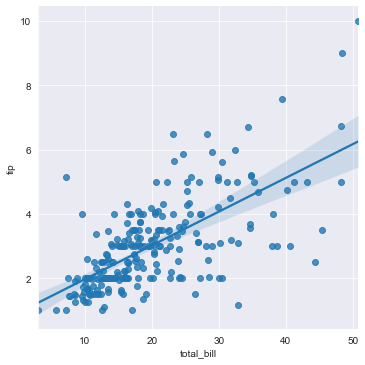

In [32]:
#darkgrid, lmplot -> scatter, 1차fit, 유효범위 ci 표시
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip',data=tips,height=5)
plt.show()

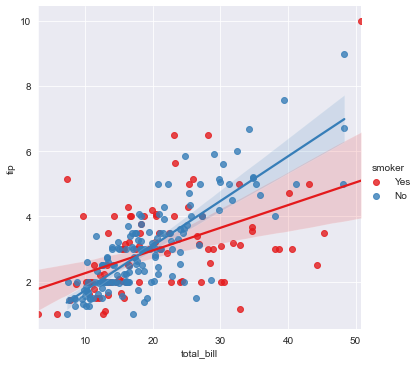

In [33]:
#lmplot도 hue 옵션 가능, palette 지정
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,palette='Set1',height=5)
plt.show()

In [34]:
#연도, 월별 항공기 승객수
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
#pivot 함수로 편리하게 테이블로 만들 수 있음 -> scatte table!!!
flights = flights.pivot('month','year','passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


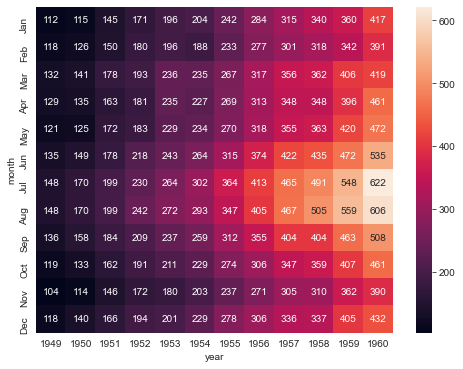

In [36]:
#heatmap -> scatter table 그리기 아주 좋음!!!
plt.figure(figsize=(8,6))
sns.heatmap(flights,annot=True,fmt='d')
plt.show()

In [37]:
# 머신러닝에서 중요한 아이리스 꽃 데이터
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


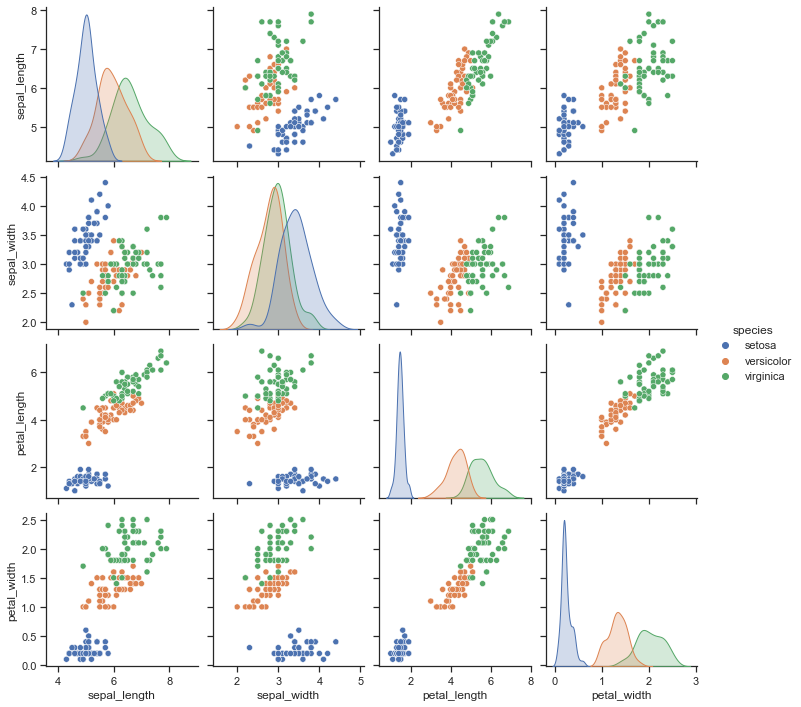

In [38]:
#pairplot으로 상관도 분석
sns.pairplot(iris,hue='species')
plt.show()

In [39]:
#범죄 데이터 sns를 이용한 시각화 분석
#그래프에 대한 한글 폰트 문제 해결
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
    print('Windows')
else:
    print('Unknown system')
    

Windows


In [40]:
writer = pd.ExcelWriter('./result.xlsx', engine='xlsxwriter')
crime_anal_norm.to_excel(writer)
writer.save()

In [41]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581,2.034438


In [42]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581,2.034438


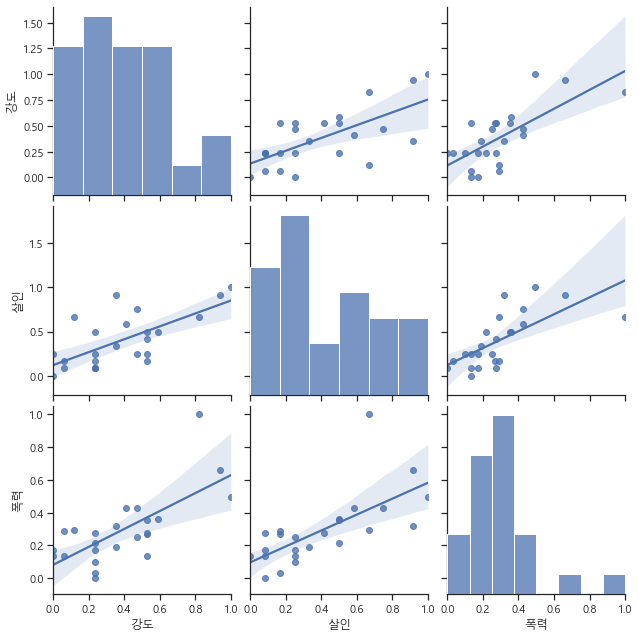

In [43]:
#pairplot으로 강도 살인 폭력 간의 상관관계
#king = 'reg' -> regression 옵션
#size -> height로 변경
sns.pairplot(crime_anal_norm,vars=['강도','살인','폭력'],kind='reg',height=3)
plt.show()

In [44]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581,2.034438
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,435751,3227,2.398678
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,249641,1634,0.589867
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,529532,1906,1.736946
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,329300,858,0.318627


c:\users\kcs\anaconda3\envs\study36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kcs\anaconda3\envs\study36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


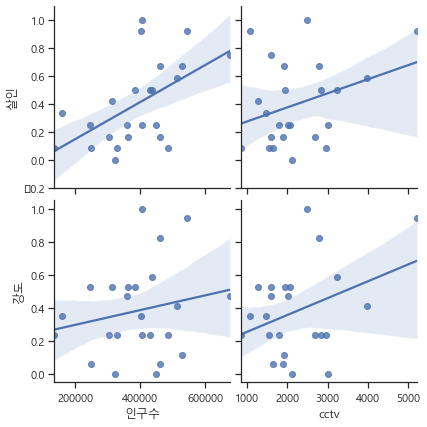

In [45]:
# x, y 변수를 다르게 지정할 수 있음 -> x_vars, y_vars
# diag_kind=None을 해주어야 대각선 그래프가 그려짐
sns.pairplot(crime_anal_norm, x_vars=['인구수','cctv'], y_vars=['살인','강도'],diag_kind=None,kind='reg',height=3)
plt.show()

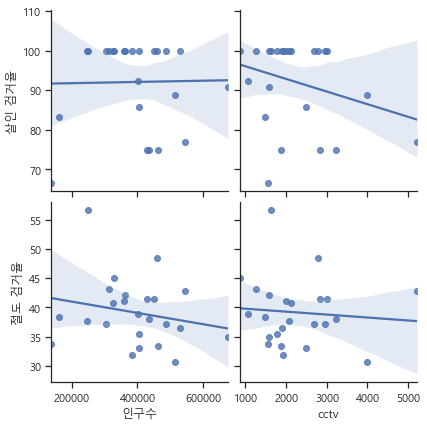

In [46]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','cctv'], y_vars=['살인 검거율','절도 검거율'], diag_kind=None, kind='reg', height=3)

In [47]:
crime_anal_norm.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간 검거율', '강도 검거율', '살인 검거율', '절도 검거율',
       '폭력 검거율', '인구수', 'cctv', '범죄'],
      dtype='object')

In [48]:
col = crime_anal_norm.columns.values[5:10]
col

array(['강간 검거율', '강도 검거율', '살인 검거율', '절도 검거율', '폭력 검거율'], dtype=object)

In [49]:
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,544085,5221,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,462275,1879,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,313550,1265,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,514555,3985,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,361923,1581,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,435751,3227,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,249641,1634,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,529532,1906,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,329300,858,0.318627,432.593167


In [50]:
#검거항목 최대값을 100으로 하고 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,329300,858,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,249641,1634,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,361923,1581,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,358679,2003,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244953,2063,1.346674,94.776790


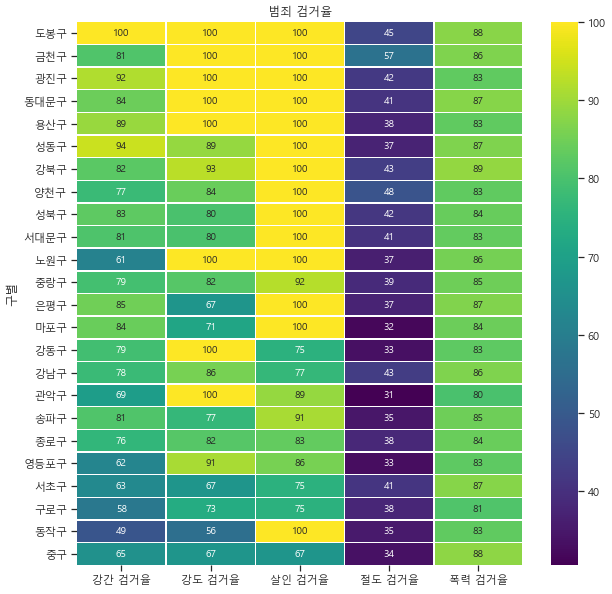

In [51]:
#heatmap으로 그려보기
#fmt : annotation 포맷,'.0f' : 정수 '.1f' : 소수점이하 1자리
#cmap : jet, viridis, cividis, plasma, inferno,magma, coolwarm -> reverse는 뒤에 _r만 붙이면 됨 예) viridis_r
#alpha : 투명도 0 ~ 1
crime_anal_norm_sort.columns
target_col = crime_anal_norm_sort.columns.values[5:10]
target_col
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='.0f',linewidths=0.5,cmap='viridis')
plt.title('범죄 검거율')
plt.show()

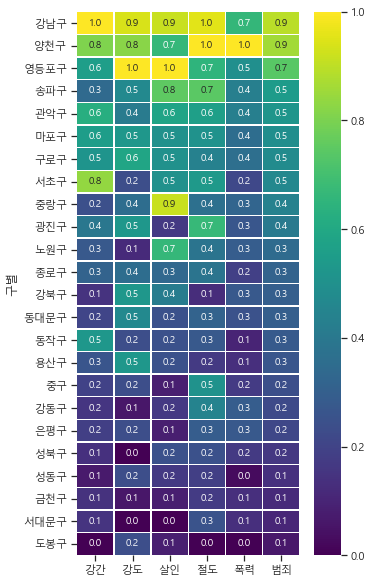

In [52]:
#범죄발생건수로 표시
crime_anal_norm.head()
crime_anal_norm.sort_values(by='범죄',ascending=False,inplace=True)
crime_anal_norm.head()
crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5
plt.figure(figsize=(5,10))
temp = [0,1,2,3,4,12]
target_col = crime_anal_norm.columns.values[temp]
target_col
sns.heatmap(crime_anal_norm[target_col],annot=True,fmt='.1f',linewidths=0.5,cmap='viridis')
plt.show()


In [53]:
#데이터 저장
crime_anal_norm.to_csv('./crime_in_seoul.csv',encoding='utf-8-sig')

In [54]:
#지도 시각화 도구 folium
import folium

In [55]:
#위도와 경도를 주면 지도를 그려준다, 하얗게 디면 구글 크롬 브라우저로 사용
#zoom_start로 줌 설정
#tiles : 옵션 -> OpenStreetMap, Stamen Toner (하천과 강), Stamen Terrain (산림), Stamen Watercolor (수채화)
map_osm = folium.Map(location=[36.400808, 127.409433], zoom_start=15,tiles='Stamen Toner')
map_osm

In [56]:
#Marker 명령으로 마크, CircleMarker로 radius, color 지정
gps = [36.400808, 127.409433]
map_2 = folium.Map(location=gps, tiles='Stamen Toner', zoom_start=15)
folium.Marker(gps,popup='The Waterfront').add_to(map_2)
folium.CircleMarker(gps,radius=50,popup='Laurelhurst Park',color='#3186cc',fill_color='#3186cc').add_to(map_2)
map_2

In [57]:
state_unemploy = './02. folium_US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemploy)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [58]:
#미국 국경 gps 좌표 정보를 담은 json
#folium의 choropleth 명령으로 경계선 json, 데이터 입력, key_on 옵션으로 지도의 id를 알려주면 됨.
state_geo = './02. folium_us-states.json'

map = folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,columns=['State','Unemployment'],key_on='feature.id',fill_color='YlGn',
              legend_name='Unemployment Rate (%)')
map

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [59]:
#서울시 범죄율 시각화
# github, southkorea map 또는 pinkwink github에서 json 파일 받기
import json
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [60]:
#서울시, 구별로 살인 건수로 지도 시각화
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data=geo_str,data=crime_anal_norm['살인'],columns=[crime_anal_norm.index, crime_anal_norm['살인']],
              fill_color='PuRd',key_on='feature.id')
map

In [61]:
# 강간 기준으로 지도 시각화
# Stamen Toner : 강과 하천
# fill_color : PuRd, YlGnBu
pos = [37.5502, 126.982]
map = folium.Map(location=pos, zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str, data=crime_anal_norm['강간'], columns=[crime_anal_norm.index, crime_anal_norm['강간']],
              fill_color='PuRd', key_on='feature.id')
map


In [62]:
#범죄 발생 건수 전체에 대한 지도 시각화
map = folium.Map(location=pos, zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data=geo_str, data=crime_anal_norm['범죄'], columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
              fill_color='YlGnBu', key_on='feature.id')
map

In [63]:
# 경찰서별 검거율과 구별 범죄 발생율 동시 시각화
crime_anal_raw['lat'] = 

SyntaxError: invalid syntax (<ipython-input-63-1ae535f7a8b8>, line 2)